<a href="https://colab.research.google.com/github/zhus-dika/railways_caclulations/blob/main/railways_calculations_transportation_volumes_p1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦇 Download spreadsheets & make dataframes

## 🐻 Prepare data

### 🐳 Install need packages

In [ ]:
! pip install pyexcel pyexcel-xls pyexcel-xlsx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 5.6 MB/s eta 0:00:00


### 🦞 Imports

In [ ]:
import pandas as pd

import gdown

from openpyxl import load_workbook

import math

### 🐧 Download files

In [ ]:
url = "https://drive.google.com/uc?id=1lazPUcaQjAwPcwoIev-_5htL3BXn31Ur"
output = '2002-2017_transportation_volumes.xlsx'
gdown.download(url, output, quiet=False);

Downloading...
From: https://drive.google.com/uc?id=1lazPUcaQjAwPcwoIev-_5htL3BXn31Ur
To: /content/2002-2017_transportation_volumes.xlsx
100%|██████████| 189k/189k [00:00<00:00, 60.2MB/s]


## 🦨 Make dataframe

### 🦆 Useful methods

In [ ]:
start = 2002
end = 2017

def excel_columns(n):
    columns = []
    for i in range(1, n + 1):
        col = ""
        num = i
        while num > 0:
            num -= 1
            col = chr(65 + (num % 26)) + col
            num //= 26
        columns.append(col)
    return columns

column_names = excel_columns(14 * (end - start + 1))

In [ ]:
def fill_volumes(table_data, start, end):
  commodities_transportation_volumes = {str(i) + '_' + str(year): [] for year in range(start, end + 1) for i in range(1, 13)}
  commodities_transportation_volumes['name'] = []
  name_column = 'A'
  for i in range(1, 82):
    if i % 4 == 0:
      value = table_data[name_column+str(i)].value
      value = value.replace(',', ' ').replace('.', ' ').replace(')', ' ').replace('(', ' ').replace('-', ' ').replace('из ', ' ').replace(' нее:', ' ').replace(' него:', ' ').replace(' них:', ' ').replace("\n", " ").lower()
      name = " ".join(value.split())
      commodities_transportation_volumes['name'].append(name)

      for column_num in range((end - start + 1) * 12):
        val_volume = table_data[column_names[column_num + 2 + math.floor(column_num / 12)] + str(i + 1)].value
        commodities_transportation_volumes[str(column_num % 12 + 1) + '_' + str(start + math.floor(column_num / 12))].append(val_volume)
  return commodities_transportation_volumes

### 🦫 Getting table data

In [ ]:
wb = load_workbook('2002-2017_transportation_volumes.xlsx')


main_sheet = 'Лист1'
commodities_transportation_volumes = {}

In [ ]:
commodities_transportation_volumes =  fill_volumes(wb[main_sheet], start, end)

In [ ]:
df_transportation_2002_2017 = pd.DataFrame(commodities_transportation_volumes)

In [ ]:
df_transportation_2002_2017

,1_2002,2_2002,3_2002,4_2002,5_2002,6_2002,7_2002,8_2002,9_2002,10_2002,...,4_2017,5_2017,6_2017,7_2017,8_2017,9_2017,10_2017,11_2017,12_2017,name
0,2663.796,2106.249,1517.161,1346.206,1478.145,784.798,1115.927,2778.823,2725.986,2564.062,...,2646.96582,2336.58627,2593.90050,2500.51129,2483.50644,2503.57334,2729.02924,3038.40564,2968.54706,уголь
1,683.687,800.592,824.258,824.818,862.446,736.293,1031.729,998.182,933.893,1005.295,...,916.57559,930.07418,945.50941,976.80527,980.25266,889.75209,995.48845,910.48934,849.81847,железная руда
2,958.488,852.496,985.893,739.948,756.224,852.697,871.824,887.028,886.174,856.716,...,48.43455,39.87749,36.88514,38.74136,35.75954,30.71176,36.29983,40.42681,22.95808,нефть сырая
3,122.633,119.130,168.993,218.058,160.754,199.382,239.539,222.502,231.921,142.893,...,468.94061,615.91487,572.23606,604.19431,535.35121,496.19440,579.48584,637.70178,608.76869,нефтепродукты
4,70.815,73.734,108.705,103.947,87.903,109.981,132.242,108.774,115.610,88.922,...,19.65586,34.70769,31.67766,33.29778,53.34503,58.59907,52.00718,46.23634,21.22702,строительные грузы
5,486.469,381.935,401.055,370.470,278.714,185.767,206.424,149.263,239.010,356.582,...,417.52379,458.74220,370.29961,390.06692,232.81605,428.29043,584.67001,707.96954,773.19390,зерно
6,111.161,153.763,44.885,77.976,94.732,109.155,137.754,161.323,118.483,160.069,...,64.46044,93.19087,88.35716,73.44834,102.26331,97.52402,116.66491,94.30510,53.55023,лом черных металлов
7,27.079,23.124,24.639,31.088,28.604,25.593,30.466,25.534,32.212,29.181,...,227.56739,275.07195,261.02121,224.41587,192.26716,222.48341,238.99015,279.33065,270.80676,химикаты и сода
8,84.932,87.383,78.324,38.983,23.321,42.517,26.779,23.851,19.062,42.564,...,81.01024,73.14061,58.22604,70.40305,82.43944,83.40356,73.57911,78.86882,98.25128,хим и мин удобрения
9,98.979,127.673,146.584,154.466,160.600,156.314,167.945,165.608,173.101,158.678,...,201.34803,209.67070,205.26785,224.16074,218.52483,207.52494,211.04347,232.70583,192.21316,цветная руда


### 🦪 Add common type

In [ ]:
dct_names = {'Coal': 'Уголь',
            'Iron': 'Железная руда',
            'Earth': 'Земля, песок, глина и камни природные',
            'Lim': 'Известняк для флюсования',
            'Coke': 'Кокс каменноугольный',
            'Black': 'Чер. металлы',
            'Scrap': 'Лом черных металлов',
            'Wheat': 'Мука пшеничная',
            'Oil': 'Нефть сырая',
            'Petrol': 'Нефтепродукты',
            'Drinks': 'Соки и напитки',
            'Fert': 'Хим. и мин. удобрения',
            'nFerr': 'Цвет. металлы',
            'ColOre': 'Цветная руда',
            'Chem': 'Химикаты и сода',
            'Cement': 'Цемент'
            }

In [ ]:
for key in dct_names.keys():
  dct_names[key] = " ".join(dct_names[key].replace(',', ' ').replace('.', ' ').replace(')', ' ').replace('(', ' ').replace('-', ' ').lower().split())

In [ ]:
common_names = set(dct_names.values()) & set(df_transportation_2002_2017['name'])

In [ ]:
df_transportation_2002_2017 = df_transportation_2002_2017[df_transportation_2002_2017['name'].isin(common_names)]

In [ ]:
df_transportation_2002_2017[df_transportation_2002_2017['name'] == 'уголь']

,1_2002,2_2002,3_2002,4_2002,5_2002,6_2002,7_2002,8_2002,9_2002,10_2002,...,4_2017,5_2017,6_2017,7_2017,8_2017,9_2017,10_2017,11_2017,12_2017,name
0,2663.796,2106.249,1517.161,1346.206,1478.145,784.798,1115.927,2778.823,2725.986,2564.062,...,2646.96582,2336.58627,2593.9005,2500.51129,2483.50644,2503.57334,2729.02924,3038.40564,2968.54706,уголь


In [ ]:
df_transportation_2002_2017['type'] = ''

for idx, row in df_transportation_2002_2017.iterrows():
  for key in dct_names.keys():
    if dct_names[key] == row['name']:
      df_transportation_2002_2017.loc[idx, 'type'] = key

<ipython-input-15-8b48d9758741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transportation_2002_2017['type'] = ''


In [ ]:
df_transportation_2002_2017

,1_2002,2_2002,3_2002,4_2002,5_2002,6_2002,7_2002,8_2002,9_2002,10_2002,...,5_2017,6_2017,7_2017,8_2017,9_2017,10_2017,11_2017,12_2017,name,type
0,2663.796,2106.249,1517.161,1346.206,1478.145,784.798,1115.927,2778.823,2725.986,2564.062,...,2336.58627,2593.90050,2500.51129,2483.50644,2503.57334,2729.02924,3038.40564,2968.54706,уголь,Coal
1,683.687,800.592,824.258,824.818,862.446,736.293,1031.729,998.182,933.893,1005.295,...,930.07418,945.50941,976.80527,980.25266,889.75209,995.48845,910.48934,849.81847,железная руда,Iron
2,958.488,852.496,985.893,739.948,756.224,852.697,871.824,887.028,886.174,856.716,...,39.87749,36.88514,38.74136,35.75954,30.71176,36.29983,40.42681,22.95808,нефть сырая,Oil
3,122.633,119.130,168.993,218.058,160.754,199.382,239.539,222.502,231.921,142.893,...,615.91487,572.23606,604.19431,535.35121,496.19440,579.48584,637.70178,608.76869,нефтепродукты,Petrol
6,111.161,153.763,44.885,77.976,94.732,109.155,137.754,161.323,118.483,160.069,...,93.19087,88.35716,73.44834,102.26331,97.52402,116.66491,94.30510,53.55023,лом черных металлов,Scrap
7,27.079,23.124,24.639,31.088,28.604,25.593,30.466,25.534,32.212,29.181,...,275.07195,261.02121,224.41587,192.26716,222.48341,238.99015,279.33065,270.80676,химикаты и сода,Chem
8,84.932,87.383,78.324,38.983,23.321,42.517,26.779,23.851,19.062,42.564,...,73.14061,58.22604,70.40305,82.43944,83.40356,73.57911,78.86882,98.25128,хим и мин удобрения,Fert
9,98.979,127.673,146.584,154.466,160.600,156.314,167.945,165.608,173.101,158.678,...,209.67070,205.26785,224.16074,218.52483,207.52494,211.04347,232.70583,192.21316,цветная руда,ColOre
10,84.828,76.213,75.157,80.212,76.372,73.441,76.580,74.544,68.794,88.396,...,77.72916,95.26382,83.41777,86.08680,70.72577,79.70613,86.23693,81.32165,цвет металлы,nFerr
11,439.364,368.078,407.208,413.550,398.634,364.363,388.781,401.465,367.349,433.774,...,448.62033,399.95634,472.76586,445.40354,410.64106,400.38506,421.13589,464.82703,чер металлы,Black


In [ ]:
df_transportation_2002_2017 = df_transportation_2002_2017.drop(columns=['name']).set_index('type')

## 🐭 Prepare indexed data

In [ ]:
import copy

df_transportation_2002_2017_with_index = copy.deepcopy(df_transportation_2002_2017)

In [ ]:
for column in df_transportation_2002_2017_with_index.columns:
  column_prefix, column_postfix = column.split('_')[0], column.split('_')[1]
  if column_postfix == '2002':
    df_transportation_2002_2017_with_index[column] = 0
  else:
    df_transportation_2002_2017_with_index[column] = df_transportation_2002_2017[column] / df_transportation_2002_2017[column_prefix + '_' + str(int(column_postfix)-1)]

In [ ]:
df_transportation_2002_2017_with_index.dtypes

,0
1_2002,int64
2_2002,int64
3_2002,int64
4_2002,int64
5_2002,int64
...,...
8_2017,float64
9_2017,float64
10_2017,float64
11_2017,float64


In [ ]:
df_transportation_2002_2017_with_index = df_transportation_2002_2017_with_index.dropna()

In [ ]:
df_transportation_2002_2017_with_index.shape

(14, 192)

## 🐬 Seasonal adjustment

### 🐦 Install need packages & import them

In [ ]:
! apt install x13as

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  x13as
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,178 kB of archives.
After this operation, 3,076 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 x13as amd64 1.1-b58-1 [1,178 kB]
Fetched 1,178 kB in 0s (4,967 kB/s)
Selecting previously unselected package x13as.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../x13as_1.1-b58-1_amd64.deb ...
Unpacking x13as (1.1-b58-1) ...
Setting up x13as (1.1-b58-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import statsmodels.api as sm

In [ ]:
df_transportation_2003_2017_with_index = copy.deepcopy(df_transportation_2002_2017_with_index).drop(columns=[column for column in df_transportation_2002_2017_with_index.columns if column.split('_')[1] == '2002'])

In [ ]:
date_rng = pd.date_range(start='2003-01', periods=180, freq='ME')
date_rng

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', length=180, freq='ME')

In [ ]:
dct_names = {column: date_rng[idx] for idx, column in enumerate(df_transportation_2003_2017_with_index.columns)}

df_transportation_2003_2017_with_index = df_transportation_2003_2017_with_index.rename(columns=dct_names)

In [ ]:
df_transportation_2003_2017_with_index

,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,...,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31
type,,,,,,,,,,,,,,,,,,,,,
Coal,1.146989,1.271296,2.001057,1.617007,1.497430,2.758001,1.602998,0.851024,0.779384,0.822710,...,1.299334,1.142139,1.127997,1.232185,1.185096,1.113000,0.890330,0.961143,1.088174,0.912056
Iron,1.412507,1.134848,1.154288,1.236893,1.152850,1.289855,1.010562,1.016424,1.126092,1.041267,...,1.027275,1.132663,1.022012,1.012473,1.244028,1.367165,1.146183,1.374477,1.153021,0.979902
Oil,1.001428,0.888155,0.881444,1.181056,1.216150,0.812597,0.862972,0.754016,0.798269,0.892205,...,1.176338,0.807852,0.602213,0.568115,0.555227,0.526765,0.670949,0.827540,0.679410,0.432077
Petrol,1.284108,1.637060,1.612777,1.293651,1.817554,1.618301,1.407716,1.418118,1.159494,1.268705,...,1.318899,0.804209,0.999319,0.876377,1.012419,0.888688,0.895795,1.082105,1.182459,1.007365
Scrap,0.678691,0.532579,1.807040,1.914268,1.586697,0.737438,1.703007,0.809680,1.254796,0.951983,...,1.519347,1.133832,1.079397,0.991456,1.032845,1.302089,1.657707,1.855247,1.647698,0.938190
Chem,1.216552,1.593323,1.774747,1.455706,1.530870,2.313289,2.906289,3.147999,2.518254,2.785785,...,1.028769,1.130495,1.269602,1.215072,1.050996,1.024412,1.121212,1.076929,1.367488,1.166974
Fert,0.450490,0.481707,0.232368,0.571711,0.806826,0.577675,1.912095,1.255293,0.676110,1.062236,...,2.927121,1.770061,1.477692,1.459975,1.212330,1.370909,1.462060,1.056533,1.260649,1.654754
ColOre,1.641106,1.123237,1.138699,1.060674,0.915629,0.867734,1.291238,0.916725,0.980069,1.079312,...,1.335836,1.524611,1.208066,1.095505,1.173166,1.115001,1.110992,1.175206,1.251143,1.014130
nFerr,0.780851,0.820083,0.874303,0.875019,0.914157,0.721109,1.302220,1.104193,1.031660,0.756856,...,1.132900,0.987474,0.963341,1.116579,1.021599,1.132623,0.918010,0.939456,1.047109,0.875349


## 🐊 Compare results

In [ ]:
url = "https://drive.google.com/uc?id=12N8nNbwd5c3NHO5qtztr3HoRmPZzwt6-"
output = '2002-2017_coal_equations.xlsx'
gdown.download(url, output, quiet=False);

Downloading...
From: https://drive.google.com/uc?id=12N8nNbwd5c3NHO5qtztr3HoRmPZzwt6-
To: /content/2002-2017_coal_equations.xlsx
100%|██████████| 33.1k/33.1k [00:00<00:00, 18.8MB/s]


In [ ]:
df_eviews = pd.read_excel('2002-2017_coal_equations.xlsx', index_col='dateid01')

In [ ]:
df_eviews.head()

,coal_exp_t,coal_exp_v,coal_exp_v_sa,coal_imp_t,coal_imp_v,coal_imp_v_sa,coal_int_t,coal_int_v,coal_int_v_sa,coal_m,coal_m_sa,ser0306,ser0406,ser1006,ser1311,ser1312,ser1412,ser1501,ser1510,ser1706
dateid01,,,,,,,,,,,,,,,,,,,,
2003-01-01,1.0,1.146989,1.267059,1.0,1.796689,1.883665,1.0,1.242252,1.261167,1.149409,1.203917,0,0,0,0,0,0,0,0,0
2003-02-01,1.0,1.271296,1.391043,1.0,1.792560,1.877864,1.0,1.034555,1.027866,1.127601,1.133489,0,0,0,0,0,0,0,0,0
2003-03-01,1.0,2.001057,1.752078,1.0,2.254746,2.350010,1.0,1.250464,1.242864,1.534823,1.499511,0,0,0,0,0,0,0,0,0
2003-04-01,1.0,1.617007,1.579679,1.0,3.231887,2.709096,1.0,1.393124,1.398157,1.554613,1.543364,0,0,0,0,0,0,0,0,0
2003-05-01,1.0,1.497430,1.486441,1.0,1.013763,1.176088,1.0,1.074671,1.067608,1.244032,1.241191,0,0,0,0,0,0,0,0,0


### 🪲 Plot data

In [ ]:
df_transportation_2003_2017_with_index_adjusted = copy.deepcopy(df_transportation_2003_2017_with_index)

In [ ]:
import matplotlib.pyplot as plt

for idx, row in df_transportation_2003_2017_with_index.iterrows():
  data = row

  res = sm.tsa.x13_arima_analysis(data, freq='M')

  adjusted_series = res.seasadj
  df_transportation_2003_2017_with_index_adjusted.loc[f'{idx}_adjusted'] = adjusted_series
  # print(idx)
  # plt.figure(figsize=(12,5))
  # plt.plot(data, label="source data")
  # plt.plot(adjusted_series, label="seasonal adjustment data", linestyle="dashed")
  # plt.legend()
  # plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/x13.py:192: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/x13.py:192: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/x13.py:192: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/x13.py:192: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regA

In [ ]:
df_transportation_2003_2017_with_index_adjusted

,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,...,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31
type,,,,,,,,,,,,,,,,,,,,,
Coal,1.146989,1.271296,2.001057,1.617007,1.497430,2.758001,1.602998,0.851024,0.779384,0.822710,...,1.299334,1.142139,1.127997,1.232185,1.185096,1.113000,0.890330,0.961143,1.088174,0.912056
Iron,1.412507,1.134848,1.154288,1.236893,1.152850,1.289855,1.010562,1.016424,1.126092,1.041267,...,1.027275,1.132663,1.022012,1.012473,1.244028,1.367165,1.146183,1.374477,1.153021,0.979902
Oil,1.001428,0.888155,0.881444,1.181056,1.216150,0.812597,0.862972,0.754016,0.798269,0.892205,...,1.176338,0.807852,0.602213,0.568115,0.555227,0.526765,0.670949,0.827540,0.679410,0.432077
Petrol,1.284108,1.637060,1.612777,1.293651,1.817554,1.618301,1.407716,1.418118,1.159494,1.268705,...,1.318899,0.804209,0.999319,0.876377,1.012419,0.888688,0.895795,1.082105,1.182459,1.007365
Scrap,0.678691,0.532579,1.807040,1.914268,1.586697,0.737438,1.703007,0.809680,1.254796,0.951983,...,1.519347,1.133832,1.079397,0.991456,1.032845,1.302089,1.657707,1.855247,1.647698,0.938190
Chem,1.216552,1.593323,1.774747,1.455706,1.530870,2.313289,2.906289,3.147999,2.518254,2.785785,...,1.028769,1.130495,1.269602,1.215072,1.050996,1.024412,1.121212,1.076929,1.367488,1.166974
Fert,0.450490,0.481707,0.232368,0.571711,0.806826,0.577675,1.912095,1.255293,0.676110,1.062236,...,2.927121,1.770061,1.477692,1.459975,1.212330,1.370909,1.462060,1.056533,1.260649,1.654754
ColOre,1.641106,1.123237,1.138699,1.060674,0.915629,0.867734,1.291238,0.916725,0.980069,1.079312,...,1.335836,1.524611,1.208066,1.095505,1.173166,1.115001,1.110992,1.175206,1.251143,1.014130
nFerr,0.780851,0.820083,0.874303,0.875019,0.914157,0.721109,1.302220,1.104193,1.031660,0.756856,...,1.132900,0.987474,0.963341,1.116579,1.021599,1.132623,0.918010,0.939456,1.047109,0.875349


In [ ]:
df_transportation_2003_2017_with_index_adjusted.to_excel("transportation_volumes.xlsx", sheet_name='transportation_volumes')

Coal


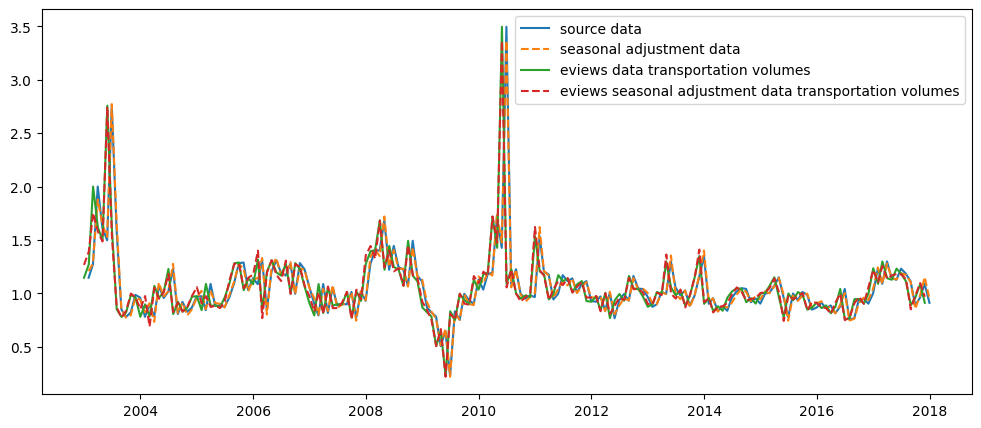

In [ ]:
import matplotlib.pyplot as plt

for idx, row in df_transportation_2003_2017_with_index.iterrows():
  if idx =='Coal':
    data = row

    res = sm.tsa.x13_arima_analysis(data, freq='M')

    adjusted_series = res.seasadj

    print(idx)
    plt.figure(figsize=(12,5))
    plt.plot(data, label="source data")
    plt.plot(adjusted_series, label="seasonal adjustment data", linestyle="dashed")
    plt.plot(df_eviews['coal' + '_exp_v'], label="eviews data transportation volumes")
    plt.plot(df_eviews['coal' + '_exp_v_sa'], label="eviews seasonal adjustment data transportation volumes", linestyle="dashed")
    plt.legend()
    plt.show()